<a href="https://colab.research.google.com/github/harshavardhangadila/Sample1/blob/main/HW_1_Clustering_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Wrangling and Preparation**

### Import Necessary Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Mount Google *Drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the Dataset

In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/ML-Spring-2025/Team Titans/Datasets/Bank_Loan_Approval_Predictor/credit_train.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


### Check Dataset Information

In [ ]:
# Check dataset info (data types, missing values)
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent 

### Check Summary Statistics

In [ ]:
# Check summary statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


### Check for Missing Values

In [ ]:
# Check missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


,0
Loan ID,514
Customer ID,514
Loan Status,514
Current Loan Amount,514
Term,514
Credit Score,19668
Annual Income,19668
Years in current job,4736
Home Ownership,514
Purpose,514


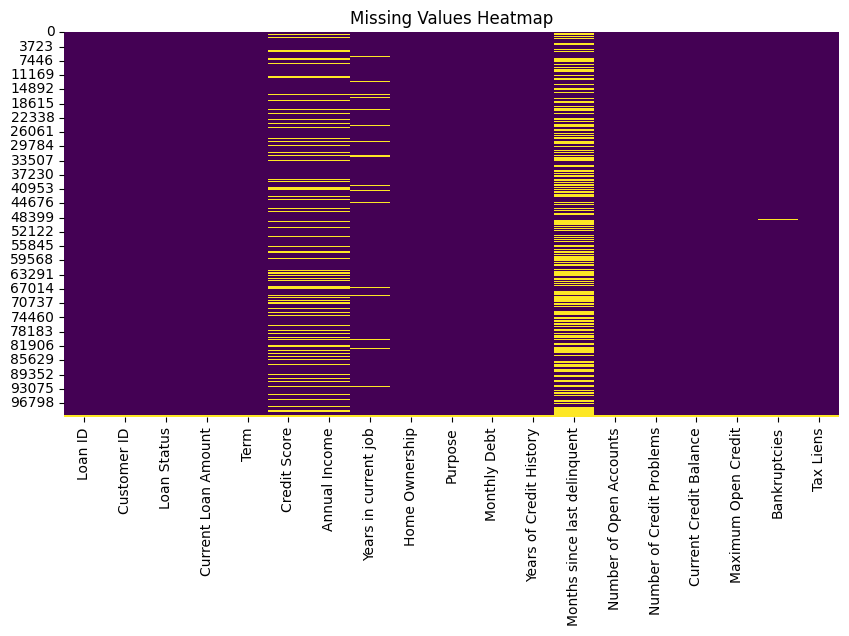

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### Data Cleaning: Handling Categorical Variables

In [ ]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Loan ID", "Customer ID"], errors="ignore")  # Ignore error if column missing

# Check unique values in Loan Status BEFORE processing
print("Unique values in Loan Status column before cleaning:")
print(df_cleaned["Loan Status"].unique())

# Remove rows where 'Loan Status' is missing
df_cleaned = df_cleaned.dropna(subset=["Loan Status"])

# Ensure only two categories exist
df_cleaned = df_cleaned[df_cleaned["Loan Status"].isin(["Fully Paid", "Charged Off"])]

# Map Loan Status correctly
df_cleaned["Loan Status"] = df_cleaned["Loan Status"].map({"Fully Paid": 0, "Charged Off": 1})

# Verify mapping
print("Unique values in Loan Status after mapping:")
print(df_cleaned["Loan Status"].unique())


Unique values in Loan Status column before cleaning:
['Fully Paid' 'Charged Off' nan]
Unique values in Loan Status after mapping:
[0 1]


### Distribution of Loan Status





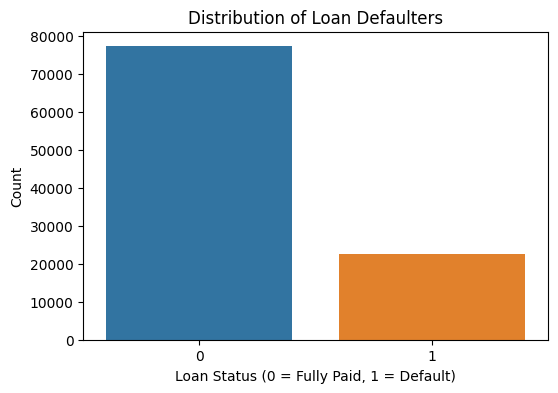

In [ ]:
# --- 🔹 Fix Loan Status Count Plot ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x="Loan Status", hue="Loan Status", legend=False)
plt.title("Distribution of Loan Defaulters")
plt.xlabel("Loan Status (0 = Fully Paid, 1 = Default)")
plt.ylabel("Count")
plt.show()

### Detecting Outliers using IQR Method

In [ ]:

# Define function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

# Check outliers in key numerical features
numerical_features = ["Current Loan Amount", "Credit Score", "Annual Income",
                      "Monthly Debt", "Years of Credit History", "Current Credit Balance"]

outlier_counts = {col: detect_outliers(df_cleaned, col) for col in numerical_features}

print("\nOutliers detected in numerical features:")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count} outliers")



Outliers detected in numerical features:
Current Loan Amount: 11484 outliers
Credit Score: 7115 outliers
Annual Income: 3809 outliers
Monthly Debt: 3362 outliers
Years of Credit History: 3089 outliers
Current Credit Balance: 5184 outliers


### Removing Outliers using IQR Method

In [ ]:
# Define function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numerical feature
numerical_features = ["Current Loan Amount", "Credit Score", "Annual Income",
                      "Monthly Debt", "Years of Credit History", "Current Credit Balance"]

for col in numerical_features:
    df_cleaned = remove_outliers(df_cleaned, col)

# Confirm shape after removing outliers
print(f"\nDataset shape after outlier removal: {df_cleaned.shape}")

# Verify if outliers remain
outlier_counts = {col: detect_outliers(df_cleaned, col) for col in numerical_features}
print("\nRemaining outliers after removal:")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count} outliers")



Dataset shape after outlier removal: (53777, 17)

Remaining outliers after removal:
Current Loan Amount: 1169 outliers
Credit Score: 556 outliers
Annual Income: 941 outliers
Monthly Debt: 524 outliers
Years of Credit History: 749 outliers
Current Credit Balance: 897 outliers


## **1. Applying K-Means Clustering using Scikit-Learn**


---





### Standardizing Numerical Features


Summary Statistics After Scaling:


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance
count,5.377700e+04,5.377700e+04,5.377700e+04,5.377700e+04,5.377700e+04,5.377700e+04
mean,6.183573e-17,-3.057433e-16,-5.086914e-17,1.281638e-16,2.457574e-17,-1.169329e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.634587e+00,-2.947293e+00,-2.177684e+00,-1.836437e+00,-2.302803e+00,-1.443391e+00
25%,-7.680762e-01,-5.667977e-01,-7.488701e-01,-7.475985e-01,-6.991292e-01,-7.701082e-01
50%,-1.707662e-01,1.257099e-01,-1.449736e-01,-1.255356e-01,-1.300835e-01,-2.245782e-01
75%,6.122807e-01,8.614993e-01,5.871564e-01,6.219989e-01,5.941564e-01,5.803888e-01
max,2.984149e+00,1.424162e+00,3.257236e+00,3.035102e+00,2.853095e+00,2.982146e+00


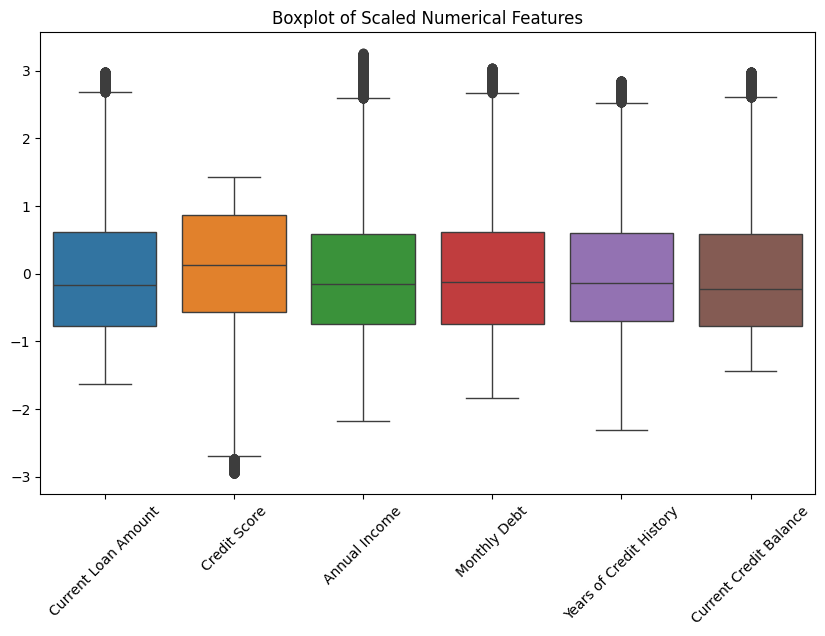

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features for scaling
numerical_features = ["Current Loan Amount", "Credit Score", "Annual Income",
                      "Monthly Debt", "Years of Credit History", "Current Credit Balance"]

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical features
df_scaled = df_cleaned.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Confirm scaled data
print("\nSummary Statistics After Scaling:")
display(df_scaled[numerical_features].describe())

# Visualize scaled data distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df_scaled[numerical_features])
plt.xticks(rotation=45)
plt.title("Boxplot of Scaled Numerical Features")
plt.show()


###  Finding the Optimal Number of Clusters Using the Elbow Method

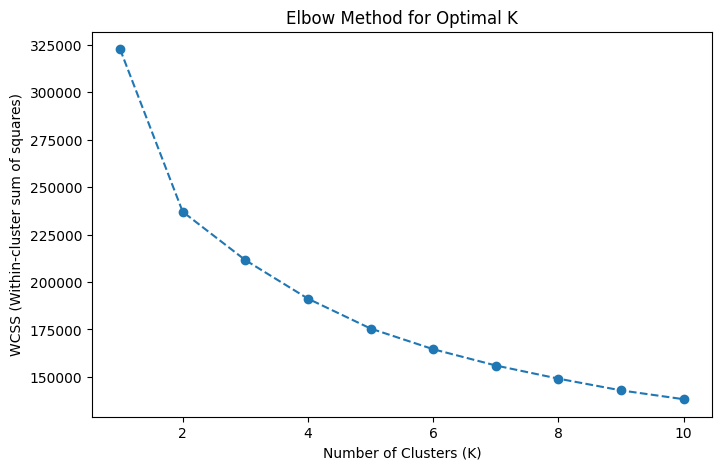

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Find optimal number of clusters using Elbow Method
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)  # Test K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[numerical_features])
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


### Applying K-Means Clustering


Cluster Distribution:
Cluster
0    17637
1    15739
2    10729
3     9672
Name: count, dtype: int64


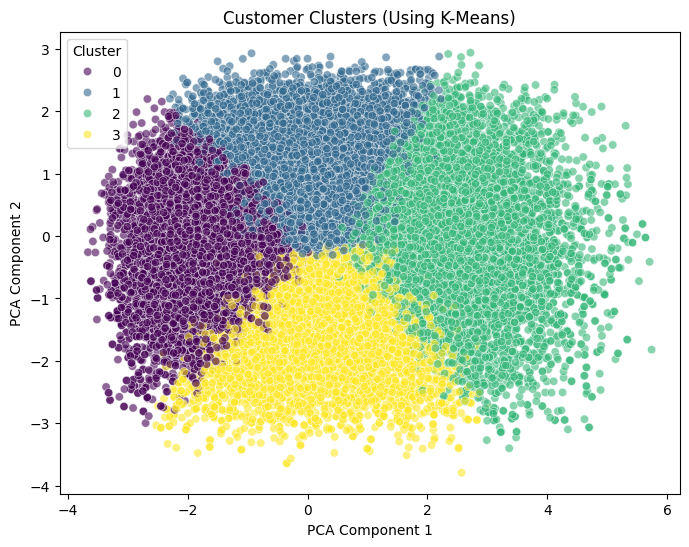

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Set the optimal number of clusters from the Elbow Method
optimal_k = 4  # Change this based on your Elbow Method result

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled[numerical_features])

# Check cluster distribution
print("\nCluster Distribution:")
print(df_scaled["Cluster"].value_counts())

# --- 🔹 Visualizing Clusters using PCA (Reduce to 2D for plotting) ---
pca = PCA(n_components=2)  # Reduce features to 2D for visualization
df_scaled_pca = pca.fit_transform(df_scaled[numerical_features])
df_scaled["PCA1"] = df_scaled_pca[:, 0]
df_scaled["PCA2"] = df_scaled_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["PCA1"], y=df_scaled["PCA2"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.6)
plt.title("Customer Clusters (Using K-Means)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


### Analyzing Cluster Characteristics

<Figure size 1000x600 with 0 Axes>

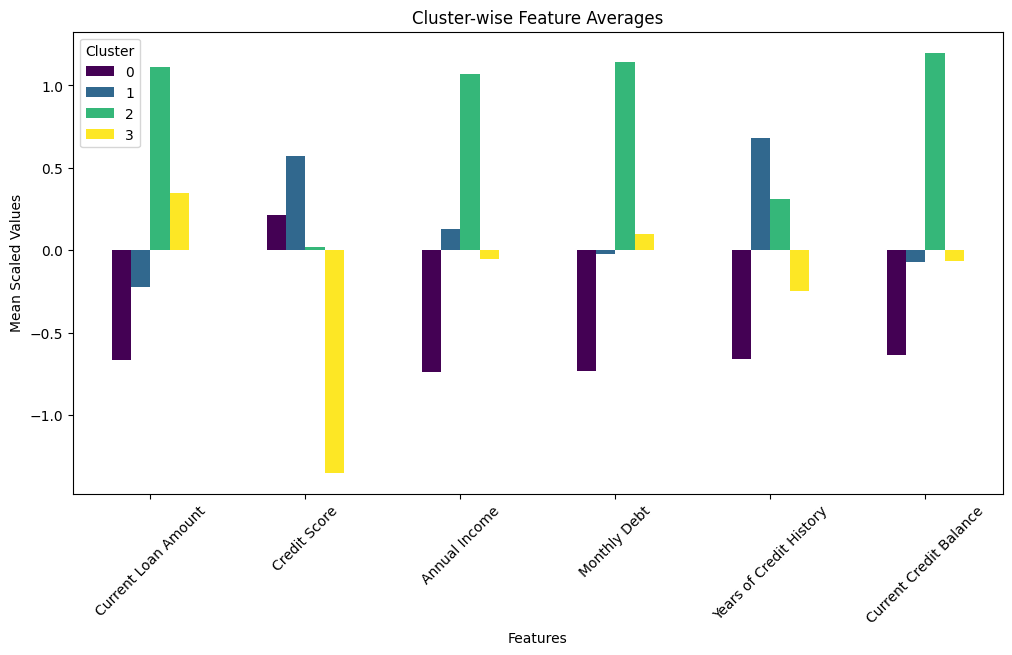

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance
Cluster,,,,,,
0,-0.666807,0.217105,-0.737395,-0.729488,-0.660727,-0.633493
1,-0.223687,0.570523,0.130020,-0.021237,0.679026,-0.068152
2,1.112362,0.022127,1.069759,1.140653,0.313551,1.199077
3,0.346004,-1.348836,-0.053597,0.099479,-0.247936,-0.064034


In [ ]:
# Group by cluster and compute mean values
cluster_summary = df_scaled.groupby("Cluster")[numerical_features].mean()

# Visualize Cluster Characteristics
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
cluster_summary.T.plot(kind="bar", figsize=(12,6), colormap="viridis")
plt.title("Cluster-wise Feature Averages")
plt.xlabel("Features")
plt.ylabel("Mean Scaled Values")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.show()

# Display Cluster Summary Table
# Instead, display the cluster summary using pandas' display function:
display(cluster_summary.style.set_caption("Cluster Analysis Summary"))

###  Visualizing Feature Distributions Across Clusters

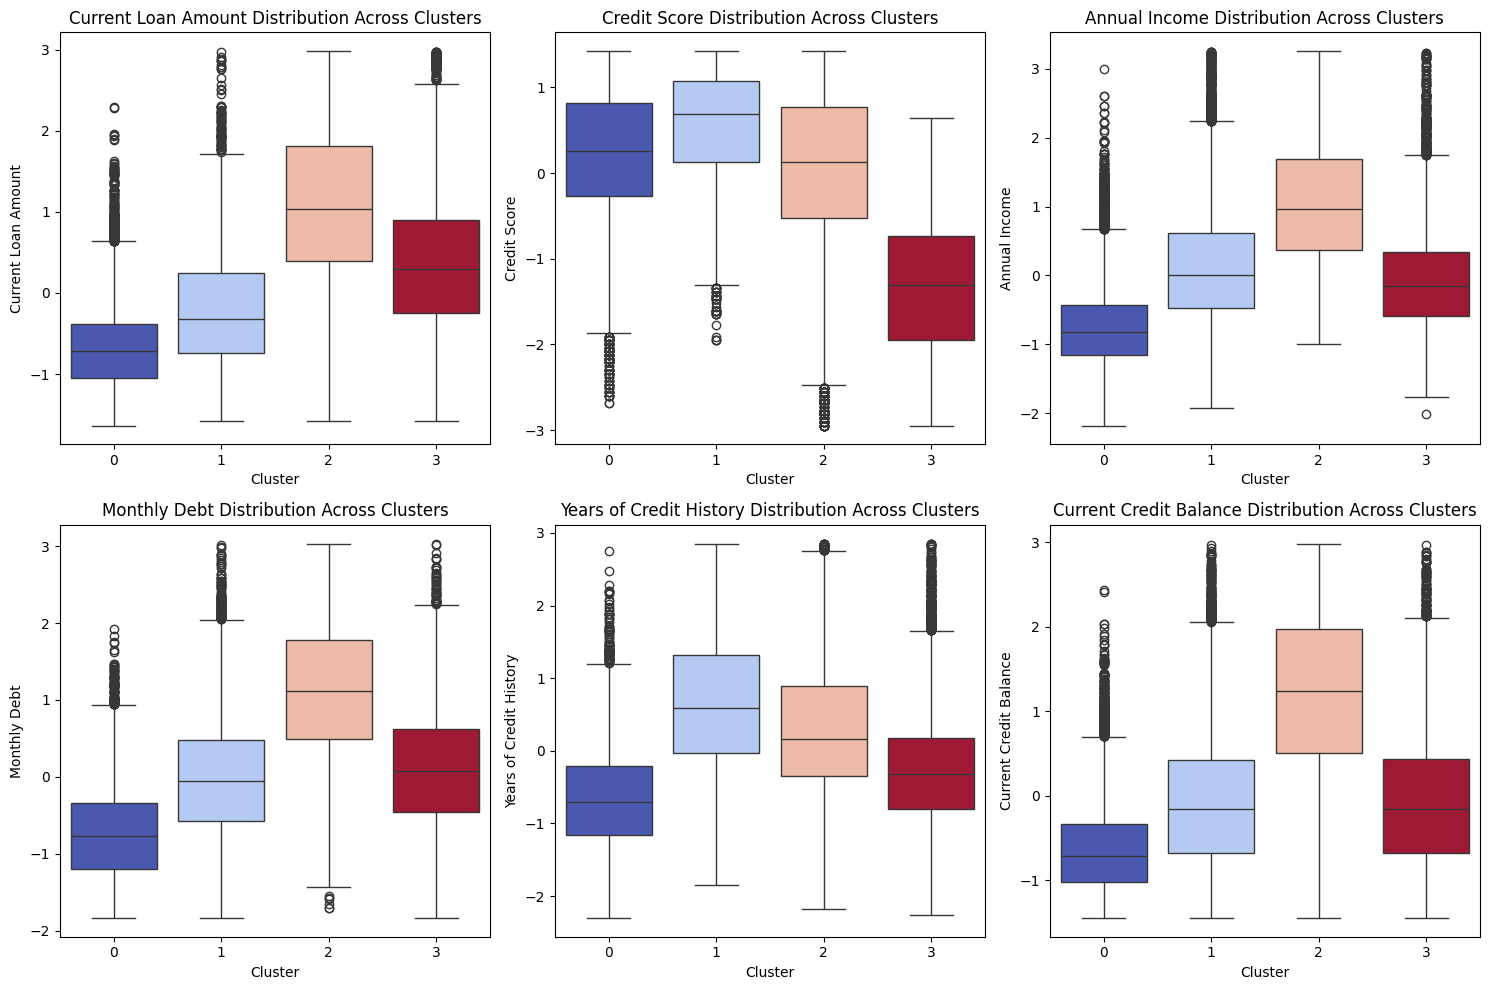

In [ ]:
# Define numerical features to analyze
features_to_plot = ["Current Loan Amount", "Credit Score", "Annual Income", "Monthly Debt", "Years of Credit History", "Current Credit Balance"]

# Create plots for feature distribution across clusters
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    row, col = divmod(i, 3)
    sns.boxplot(data=df_scaled, x="Cluster", y=feature, ax=axes[row, col], hue="Cluster", legend=False, palette="coolwarm")
    axes[row, col].set_title(f"{feature} Distribution Across Clusters")
    axes[row, col].set_xlabel("Cluster")
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()


## **2. Applying Gaussian Mixture Models Clustering using TensorFlow**

### Installing TensorFlow Probability for GMM

In [ ]:
!pip uninstall -y tensorflow-probability
!pip install --upgrade tensorflow-probability

Found existing installation: tensorflow-probability 0.25.0
Uninstalling tensorflow-probability-0.25.0:
  Successfully uninstalled tensorflow-probability-0.25.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 75.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

tfd = tfp.distributions  # Alias for TensorFlow Probability distributions

# Convert Pandas DataFrame to NumPy for TensorFlow
X_numpy = df_scaled[numerical_features].values.astype(np.float32)

# Number of clusters (based on Elbow method)
num_clusters = 4  # Change if necessary

# Initialize GMM parameters
initial_means = X_numpy[np.random.choice(X_numpy.shape[0], num_clusters, replace=False)]
initial_scale_diag = np.ones([num_clusters, X_numpy.shape[1]], dtype=np.float32)

### Define mixture model with Gaussian components

In [ ]:
# Define mixture model with Gaussian components
mixture_distribution = tfd.Categorical(
    logits=tf.Variable(tf.zeros([num_clusters]), dtype=tf.float32)
)

components_distribution = tfd.MultivariateNormalDiag(
    loc=tf.Variable(initial_means, dtype=tf.float32),  # Cluster means
    scale_diag=tf.Variable(initial_scale_diag, dtype=tf.float32)  # Covariance diagonal
)

gmm = tfd.MixtureSameFamily(
    mixture_distribution=mixture_distribution,
    components_distribution=components_distribution
)

### Training the GMM Model

In [ ]:
# Training loop
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
num_steps = 1000

print("\n Training GMM...\n")
for step in range(num_steps):
    with tf.GradientTape() as tape:
        loss = -tf.reduce_mean(gmm.log_prob(X_numpy))  # Negative log likelihood
    grads = tape.gradient(loss, gmm.trainable_variables)
    optimizer.apply_gradients(zip(grads, gmm.trainable_variables))

    if step % 100 == 0:
        print(f"Step {step}: Loss = {loss.numpy()}")


 Training GMM...

Step 0: Loss = 8.919317245483398
Step 100: Loss = 7.776213645935059
Step 200: Loss = 7.699626445770264
Step 300: Loss = 7.695843696594238
Step 400: Loss = 7.695195198059082
Step 500: Loss = 7.695137977600098
Step 600: Loss = 7.695135593414307
Step 700: Loss = 7.695135593414307
Step 800: Loss = 7.695135116577148
Step 900: Loss = 7.695135593414307


### Assigning Clusters Using GMM

In [ ]:
# Assign clusters based on the highest probability component
log_probs = gmm.components_distribution.log_prob(tf.expand_dims(X_numpy, axis=1))  # Expand dims to match
responsibilities = tf.exp(log_probs).numpy()  # Convert log probabilities to normal probabilities
cluster_assignments = np.argmax(responsibilities, axis=1)

# Store the cluster assignments in DataFrame
df_scaled["Cluster_GMM_TensorFlow"] = cluster_assignments

# Check cluster distribution
print("\nCluster Distribution (TensorFlow GMM):")
print(df_scaled["Cluster_GMM_TensorFlow"].value_counts())




Cluster Distribution (TensorFlow GMM):
Cluster_GMM_TensorFlow
0    15477
2    13722
3    12676
1    11902
Name: count, dtype: int64


### Visualizing GMM Clusters

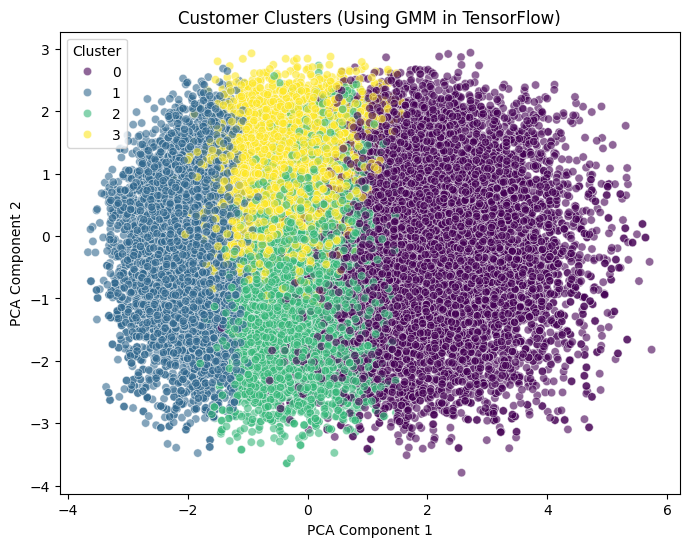

In [ ]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
df_scaled_pca = pca.fit_transform(df_scaled[numerical_features])
df_scaled["PCA1"] = df_scaled_pca[:, 0]
df_scaled["PCA2"] = df_scaled_pca[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_scaled["PCA1"], y=df_scaled["PCA2"],
    hue=df_scaled["Cluster_GMM_TensorFlow"], palette="viridis", alpha=0.6
)
plt.title("Customer Clusters (Using GMM in TensorFlow)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


### Cluster Analysis Summary for GMM

<Figure size 1000x600 with 0 Axes>

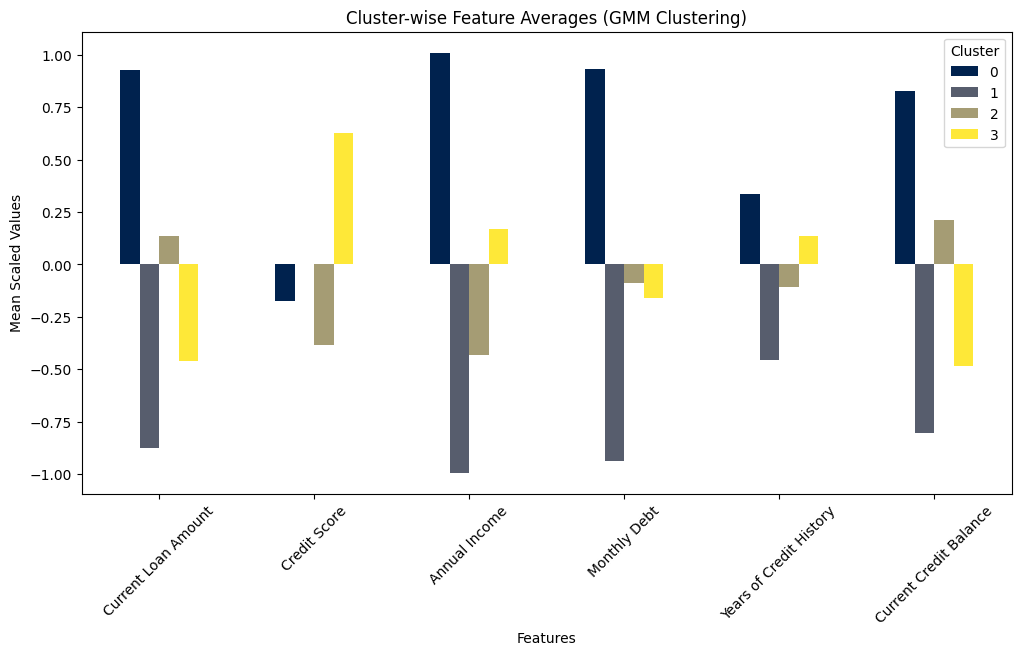

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance
Cluster_GMM_TensorFlow,,,,,,
0,0.928299,-0.172310,1.010063,0.930152,0.338003,0.826239
1,-0.873419,0.001643,-0.993099,-0.937090,-0.456280,-0.801912
2,0.134553,-0.386435,-0.434078,-0.088727,-0.109828,0.212157
3,-0.458993,0.627165,0.169103,-0.159768,0.134619,-0.485528


In [ ]:
cluster_summary_spectral = df_scaled.groupby("Cluster_GMM_TensorFlow")[numerical_features].mean()

# Visualize Cluster Characteristics for Spectral Clustering
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
cluster_summary_spectral.T.plot(kind="bar", figsize=(12,6), colormap="cividis")
plt.title("Cluster-wise Feature Averages (GMM Clustering)")
plt.xlabel("Features")
plt.ylabel("Mean Scaled Values")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.show()

# Display Cluster Summary Table for Spectral Clustering
display(cluster_summary_spectral.style.set_caption("Cluster Analysis Summary (GMM Clustering)"))


## **3. Applying Spectral Clustering using PyTorch**

### Convert data to NumPy format: Prepare the dataset for clustering.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.sparse.csgraph import laplacian
from scipy.sparse.linalg import eigsh
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph

# 🔹 Convert Pandas DataFrame to NumPy for PyTorch
X_numpy = df_scaled[numerical_features].values.astype(np.float32)

# 🔹 Apply PCA First (Reduce Dimensionality)
pca = PCA(n_components=3)  # Keep only 3 principal components
X_pca = pca.fit_transform(X_numpy)

# 🔹 Number of Clusters
num_clusters = 3  # Change based on experiment

### Apply PCA for dimensionality reduction: Reduce the feature space to three principal components.

In [ ]:
# 🔹 Reduce Memory Usage with k-NN Graph
n_neighbors = 20  # Reduce to 20 for minimal memory usage
affinity_matrix = kneighbors_graph(X_pca, n_neighbors=n_neighbors, mode="connectivity", include_self=True)
affinity_matrix = 0.5 * (affinity_matrix + affinity_matrix.T)  # Ensure symmetry

# 🔹 Compute Normalized Laplacian
L = laplacian(affinity_matrix, normed=True)

# 🔹 Compute Top k Eigenvectors (Sparse Decomposition)
eigvals, eigvecs = eigsh(L, k=num_clusters+1, which="SM")  # Only get smallest k+1 eigenvalues

# 🔹 Use First `num_clusters` Eigenvectors for Clustering
X_spectral = eigvecs[:, 1:num_clusters+1]

# 🔹 Apply K-Means on Spectral Embedding
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_assignments = kmeans.fit_predict(X_spectral)

# Store Cluster Assignments in DataFrame
df_scaled["Cluster_Spectral_PyTorch"] = cluster_assignments

### Visualize spectral clusters

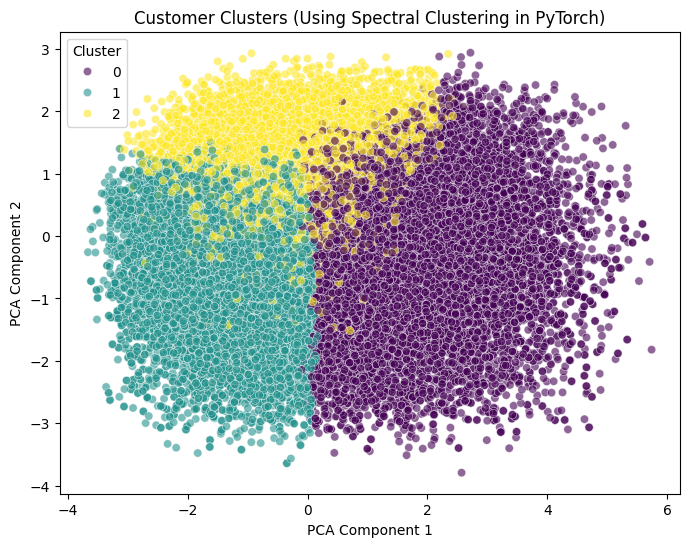

In [ ]:
# 🔹 Reduce to 2D for Visualization
df_scaled["PCA1"] = X_pca[:, 0]
df_scaled["PCA2"] = X_pca[:, 1]

# 🔹 Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_scaled["PCA1"], y=df_scaled["PCA2"],
    hue=df_scaled["Cluster_Spectral_PyTorch"], palette="viridis", alpha=0.6
)
plt.title("Customer Clusters (Using Spectral Clustering in PyTorch)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


<Figure size 1000x600 with 0 Axes>

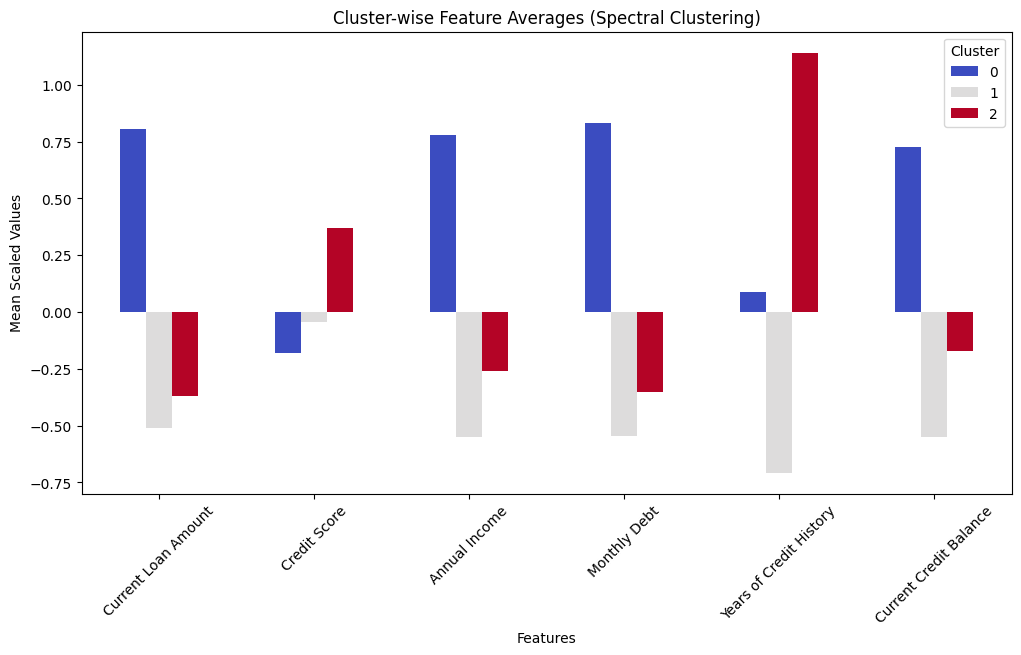

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance
Cluster_Spectral_PyTorch,,,,,,
0,0.804732,-0.178695,0.780453,0.833140,0.088549,0.726694
1,-0.509929,-0.044538,-0.548845,-0.545116,-0.706857,-0.549390
2,-0.370642,0.368803,-0.260855,-0.352518,1.140921,-0.173245


In [ ]:
# Group by Spectral Clustering labels and compute mean values
cluster_summary_spectral = df_scaled.groupby("Cluster_Spectral_PyTorch")[numerical_features].mean()

# Visualize Cluster Characteristics for Spectral Clustering
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
cluster_summary_spectral.T.plot(kind="bar", figsize=(12,6), colormap="coolwarm")
plt.title("Cluster-wise Feature Averages (Spectral Clustering)")
plt.xlabel("Features")
plt.ylabel("Mean Scaled Values")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.show()

# Display Cluster Summary Table for Spectral Clustering
display(cluster_summary_spectral.style.set_caption("Cluster Analysis Summary (Spectral Clustering)"))


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Step 1: Perform Hierarchical Clustering
num_clusters = 4  # Define number of clusters

# Compute linkage matrix using Ward’s method (minimizes variance within clusters)
linkage_matrix = linkage(df_scaled[numerical_features], method='ward')

# 🔹 Step 2: Assign Cluster Labels
df_scaled['Cluster_Hierarchical'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# 🔹 Step 3: Display first few rows with assigned cluster labels
print(df_scaled.head())

# 🔹 Step 4: Visualize Dendrogram (Optional)
plt.figure(figsize=(10, 5))
sns.clustermap(df_scaled[numerical_features].sample(100), method="ward", cmap="viridis", standard_scale=1)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()
